In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('PS') 
import matplotlib.pyplot as plt
import time
import datetime
import filterbyip as fbi
import Cdf
import Pmf

In [2]:
def print_percentiles(c, name):
    if c == 0:
        return null
    else:
        print('-----------------------------\n')
        print('percentile values distribution for %s\n' % name)

        print('20th Percentile:%f\n' % c.Percentile(20))    
        print('25th Percentile:%f\n' % c.Percentile(25))
        print('40th Percentile:%f\n' % c.Percentile(40))
        print('50th Percentile:%f\n' % c.Percentile(50))
        print('60th Percentile:%f\n' % c.Percentile(60))
        print('75th Percentile:%f\n' % c.Percentile(75))
        print('80th Percentile:%f\n' % c.Percentile(80))    
        print('90th Percentile:%f\n' % c.Percentile(90))
        print('99th Percentile:%f\n' % c.Percentile(99))

        print('-----------------------------\n')

In [3]:
def write_percentiles(filename, c):
	with open(filename, 'w') as f:
		f.write('values; percentile\n')
		for x, y in zip(c.xs, c.ps):
			f.write('%.2f, %.2f\n'%(x, y))

In [4]:
%autosave 20

Autosaving every 20 seconds


In [5]:
import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [7]:
tcp_tls_data = "./AWS_results/London/data/output_curl_data.csv"
quic_data = "./AWS_results/London/data/output_quic.csv"

In [8]:
scol_names = ['TimeOfMeasurement', 'Url', 'Ip', 'Port', 'DnsLookupTime', 'TCPHandshakeTime', 'ConnectionEstablishmentTime', 'TTFB', 'TotalDownloadTime', 'HttpResponse', 'HTTPVersion', 'Protocol']
tcol_names = ['TimeOfMeasurement', 'Url', 'Path', 'Ip', 'Port', 'DNSTime', 'ConnectionEstablishmentTime', 'TTFB', 'TotalDownloadTime', 'HttpResponse', 'Protocol']

In [9]:
t = pd.read_csv(quic_data, ';', names=tcol_names, header=None)
s = pd.read_csv(tcp_tls_data, ';', names=scol_names, header=None)

In [10]:
t = t.dropna()
s = s.dropna()

In [11]:
#t = t[t['TimeOfMeasurement'] > 1581721201]
#s = s[s['TimeOfMeasurement'] > 1581721201]

In [12]:
s['TTFB']=s['TTFB']-s['DnsLookupTime']
s['TotalDownloadTime']=s['TotalDownloadTime']-s['DnsLookupTime']

In [13]:
s.count()

TimeOfMeasurement              236105
Url                            236105
Ip                             236105
Port                           236105
DnsLookupTime                  236105
TCPHandshakeTime               236105
ConnectionEstablishmentTime    236105
TTFB                           236105
TotalDownloadTime              236105
HttpResponse                   236105
HTTPVersion                    236105
Protocol                       236105
dtype: int64

In [14]:
s.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,1589652002,www.google.com,216.58.204.4,443,4.236,4.337,223.140,268.011,274.352,200,HTTP/1.1,TCP/TLS1.2
1,1589652003,www.google.com,216.58.204.4,443,4.996,1.168,303.024,343.803,346.442,200,HTTP2,TCP/TLS1.2
2,1589652003,facebook.com,185.60.216.35,443,22.039,13.123,213.457,255.635,255.671,301,HTTP/1.1,TCP/TLS1.2
3,1589652004,facebook.com,185.60.216.35,443,15.587,12.968,293.943,337.616,337.660,301,HTTP/1.1,TCP/TLS1.3
4,1589652004,facebook.com,185.60.216.35,443,17.839,14.112,410.953,464.179,464.219,301,HTTP2,TCP/TLS1.2


In [15]:
t.count()

TimeOfMeasurement              591451
Url                            591451
Path                           591451
Ip                             591451
Port                           591451
DNSTime                        591451
ConnectionEstablishmentTime    591451
TTFB                           591451
TotalDownloadTime              591451
HttpResponse                   591451
Protocol                       591451
dtype: int64

In [16]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,1.589652e+09,www.0dayrox2.blogspot.com,/,216.58.205.33,443,12.391,60.646,294.884,453.066,404.0,Q043
1,1.589652e+09,www.0dayrox2.blogspot.com,/,216.58.205.33,443,0.908,74.243,355.084,448.920,404.0,Q046
2,1.589652e+09,www.0dayrox2.blogspot.com,/,216.58.205.33,443,0.944,21.414,860.889,988.966,404.0,Q050
8,1.589652e+09,www.0dayrox.blogspot.com,/,216.58.205.33,443,18.836,19.287,308.384,420.452,404.0,Q043
9,1.589652e+09,www.0dayrox.blogspot.com,/,216.58.205.33,443,22.519,25.195,249.730,398.125,404.0,Q046


In [17]:
def timestamp2human(timestamp):
    return datetime.datetime.fromtimestamp(int(timestamp)).strftime('%c')

In [18]:
s['TimeOfMeasurement'] = s['TimeOfMeasurement'].apply(timestamp2human)

In [19]:
s.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,Sat May 16 20:00:02 2020,www.google.com,216.58.204.4,443,4.236,4.337,223.140,268.011,274.352,200,HTTP/1.1,TCP/TLS1.2
1,Sat May 16 20:00:03 2020,www.google.com,216.58.204.4,443,4.996,1.168,303.024,343.803,346.442,200,HTTP2,TCP/TLS1.2
2,Sat May 16 20:00:03 2020,facebook.com,185.60.216.35,443,22.039,13.123,213.457,255.635,255.671,301,HTTP/1.1,TCP/TLS1.2
3,Sat May 16 20:00:04 2020,facebook.com,185.60.216.35,443,15.587,12.968,293.943,337.616,337.660,301,HTTP/1.1,TCP/TLS1.3
4,Sat May 16 20:00:04 2020,facebook.com,185.60.216.35,443,17.839,14.112,410.953,464.179,464.219,301,HTTP2,TCP/TLS1.2


In [20]:
s.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
236100,Wed May 20 16:53:35 2020,vtorrents.club,91.195.240.126,443,242.629,40.543,22028.365,22066.741,22066.776,403,HTTP/1.1,TCP/TLS1.2
236101,Wed May 20 16:53:55 2020,famehosted.com,52.84.94.37,443,164.491,1.403,26916.377,26956.814,26956.858,200,HTTP2,TCP/TLS1.2
236102,Wed May 20 16:54:03 2020,123europix.net,192.64.117.84,443,162.008,166.645,15817.614,15979.450,15979.487,301,HTTP/1.1,TCP/TLS1.2
236103,Wed May 20 16:54:20 2020,vtorrents.club,91.195.240.126,443,119.700,40.559,19175.730,19215.675,19215.718,403,HTTP2,TCP/TLS1.2
236104,Wed May 20 16:54:46 2020,123europix.net,192.64.117.84,443,161.081,166.122,27024.878,27186.958,27186.993,301,HTTP2,TCP/TLS1.2


In [21]:
#t['TimeOfMeasurement'] = t['TimeOfMeasurement'].apply(timestamp2human)

In [22]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,1.589652e+09,www.0dayrox2.blogspot.com,/,216.58.205.33,443,12.391,60.646,294.884,453.066,404.0,Q043
1,1.589652e+09,www.0dayrox2.blogspot.com,/,216.58.205.33,443,0.908,74.243,355.084,448.920,404.0,Q046
2,1.589652e+09,www.0dayrox2.blogspot.com,/,216.58.205.33,443,0.944,21.414,860.889,988.966,404.0,Q050
8,1.589652e+09,www.0dayrox.blogspot.com,/,216.58.205.33,443,18.836,19.287,308.384,420.452,404.0,Q043
9,1.589652e+09,www.0dayrox.blogspot.com,/,216.58.205.33,443,22.519,25.195,249.730,398.125,404.0,Q046


In [23]:
t.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
1680994,1.589986e+09,www.sivergameoficial.blogspot.com,/,172.217.169.1,443,40.044,80.554,860.409,860.481,301.0,Q050
1680996,1.589986e+09,www.ngeegame.blogspot.com,/,172.217.169.1,443,78.479,126.002,864.780,864.867,301.0,Q043
1680997,1.589986e+09,www.ngeegame.blogspot.com,/,172.217.169.1,443,41.667,79.404,243.788,243.866,301.0,Q046
1680999,1.589986e+09,www.kumutushka.blogspot.com,/,172.217.169.1,443,82.059,121.421,891.318,891.388,301.0,Q046
1681000,1.589987e+09,www.arguscarhire.com,/,93.184.220.191,443,410.245,120.637,201.588,409.898,200.0,Q043


In [24]:
def filter_by_ip(df, column):
  """reads a DataFrame, calls fbi.filter_v{4,6} to get DataFrames with rows
     containing only v4, v6 endpoints. Returns the two DataFrame as a tuple"""

  dfv6 = fbi.filter_v6(df, column)
  dfv4 = fbi.filter_v4(df, column)
  return dfv4, dfv6

In [25]:
#quic4, quic6 = filter_by_ip(t, column = 'Ip')
quic4 = t[t['Ip'].str.contains("\.")]
quic6 = t[t['Ip'].str.contains("\:")]

In [26]:
quic4.count()

TimeOfMeasurement              591451
Url                            591451
Path                           591451
Ip                             591451
Port                           591451
DNSTime                        591451
ConnectionEstablishmentTime    591451
TTFB                           591451
TotalDownloadTime              591451
HttpResponse                   591451
Protocol                       591451
dtype: int64

In [27]:
quic4.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,1.589652e+09,www.0dayrox2.blogspot.com,/,216.58.205.33,443,12.391,60.646,294.884,453.066,404.0,Q043
1,1.589652e+09,www.0dayrox2.blogspot.com,/,216.58.205.33,443,0.908,74.243,355.084,448.920,404.0,Q046
2,1.589652e+09,www.0dayrox2.blogspot.com,/,216.58.205.33,443,0.944,21.414,860.889,988.966,404.0,Q050
8,1.589652e+09,www.0dayrox.blogspot.com,/,216.58.205.33,443,18.836,19.287,308.384,420.452,404.0,Q043
9,1.589652e+09,www.0dayrox.blogspot.com,/,216.58.205.33,443,22.519,25.195,249.730,398.125,404.0,Q046


In [28]:
quic6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
dtype: int64

In [29]:
quic6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [30]:
#tcp4, tcp6 = filter_by_ip(s, column = 'Ip')
tcp4 = s[s['Ip'].str.contains("\.")]
tcp6 = s[s['Ip'].str.contains("\:")]

In [31]:
tcp4.count()

TimeOfMeasurement              236105
Url                            236105
Ip                             236105
Port                           236105
DnsLookupTime                  236105
TCPHandshakeTime               236105
ConnectionEstablishmentTime    236105
TTFB                           236105
TotalDownloadTime              236105
HttpResponse                   236105
HTTPVersion                    236105
Protocol                       236105
dtype: int64

In [32]:
tcp4.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,Sat May 16 20:00:02 2020,www.google.com,216.58.204.4,443,4.236,4.337,223.140,268.011,274.352,200,HTTP/1.1,TCP/TLS1.2
1,Sat May 16 20:00:03 2020,www.google.com,216.58.204.4,443,4.996,1.168,303.024,343.803,346.442,200,HTTP2,TCP/TLS1.2
2,Sat May 16 20:00:03 2020,facebook.com,185.60.216.35,443,22.039,13.123,213.457,255.635,255.671,301,HTTP/1.1,TCP/TLS1.2
3,Sat May 16 20:00:04 2020,facebook.com,185.60.216.35,443,15.587,12.968,293.943,337.616,337.660,301,HTTP/1.1,TCP/TLS1.3
4,Sat May 16 20:00:04 2020,facebook.com,185.60.216.35,443,17.839,14.112,410.953,464.179,464.219,301,HTTP2,TCP/TLS1.2


In [33]:
tcp6.count()

TimeOfMeasurement              0
Url                            0
Ip                             0
Port                           0
DnsLookupTime                  0
TCPHandshakeTime               0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
HTTPVersion                    0
Protocol                       0
dtype: int64

In [34]:
tcp6.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol


In [35]:
quic43 = quic4.loc[t['Protocol'] == 'Q043']
quic46 = quic4.loc[t['Protocol'] == 'Q046']
quic50 = quic4.loc[t['Protocol'] == 'Q050']
quicID24 = quic4.loc[t['Protocol'] == 'FF000018']
quic98 = quic4.loc[t['Protocol'] == '']

In [36]:
quic43.count()

TimeOfMeasurement              198480
Url                            198480
Path                           198480
Ip                             198480
Port                           198480
DNSTime                        198480
ConnectionEstablishmentTime    198480
TTFB                           198480
TotalDownloadTime              198480
HttpResponse                   198480
Protocol                       198480
dtype: int64

In [37]:
quic43.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,1.589652e+09,www.0dayrox2.blogspot.com,/,216.58.205.33,443,12.391,60.646,294.884,453.066,404.0,Q043
8,1.589652e+09,www.0dayrox.blogspot.com,/,216.58.205.33,443,18.836,19.287,308.384,420.452,404.0,Q043
16,1.589652e+09,www.100leccionesdeguitarra.blogspot.com,/,216.58.205.33,443,12.215,28.477,238.504,238.582,301.0,Q043
24,1.589652e+09,www.100negocios.com,/,66.198.240.11,443,284.825,180.878,755.496,964.221,200.0,Q043
40,1.589652e+09,www.1100021.blogspot.com,/,216.58.205.33,443,10.870,16.795,241.156,241.248,301.0,Q043


In [38]:
quic43.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
1680964,1.589986e+09,www.google.co.vi,/,216.58.213.99,443,39.069,81.148,121.099,121.273,200.0,Q043
1680985,1.589986e+09,www.sivergameoficial.blogspot.com,/,172.217.169.1,443,79.555,121.393,907.465,907.529,301.0,Q043
1680986,1.589986e+09,www.kumutushka.blogspot.com,/,172.217.169.1,443,40.132,81.052,243.309,243.397,301.0,Q043
1680996,1.589986e+09,www.ngeegame.blogspot.com,/,172.217.169.1,443,78.479,126.002,864.780,864.867,301.0,Q043
1681000,1.589987e+09,www.arguscarhire.com,/,93.184.220.191,443,410.245,120.637,201.588,409.898,200.0,Q043


In [39]:
quic46.count()

TimeOfMeasurement              196140
Url                            196140
Path                           196140
Ip                             196140
Port                           196140
DNSTime                        196140
ConnectionEstablishmentTime    196140
TTFB                           196140
TotalDownloadTime              196140
HttpResponse                   196140
Protocol                       196140
dtype: int64

In [40]:
quic46.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
1,1.589652e+09,www.0dayrox2.blogspot.com,/,216.58.205.33,443,0.908,74.243,355.084,448.920,404.0,Q046
9,1.589652e+09,www.0dayrox.blogspot.com,/,216.58.205.33,443,22.519,25.195,249.730,398.125,404.0,Q046
17,1.589652e+09,www.100leccionesdeguitarra.blogspot.com,/,216.58.205.33,443,0.906,21.545,178.578,178.658,301.0,Q046
25,1.589652e+09,www.100negocios.com,/,66.198.240.11,443,0.803,178.837,791.951,12.283,200.0,Q046
41,1.589652e+09,www.1100021.blogspot.com,/,216.58.205.33,443,0.770,19.073,206.002,206.077,301.0,Q046


In [41]:
quic46.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
1680972,1.589986e+09,www.dificultadesespecificasdelaprendizaje.blog...,/,172.217.169.1,443,2.933,119.629,326.762,326.834,301.0,Q046
1680973,1.589986e+09,www.nextdaypets.com,/,192.229.233.104,443,41.359,86.520,126.121,126.329,200.0,Q046
1680987,1.589986e+09,www.sivergameoficial.blogspot.com,/,172.217.169.1,443,41.263,80.853,285.441,285.506,301.0,Q046
1680997,1.589986e+09,www.ngeegame.blogspot.com,/,172.217.169.1,443,41.667,79.404,243.788,243.866,301.0,Q046
1680999,1.589986e+09,www.kumutushka.blogspot.com,/,172.217.169.1,443,82.059,121.421,891.318,891.388,301.0,Q046


In [42]:
quic50.count()

TimeOfMeasurement              194050
Url                            194050
Path                           194050
Ip                             194050
Port                           194050
DNSTime                        194050
ConnectionEstablishmentTime    194050
TTFB                           194050
TotalDownloadTime              194050
HttpResponse                   194050
Protocol                       194050
dtype: int64

In [43]:
quic50.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
2,1.589652e+09,www.0dayrox2.blogspot.com,/,216.58.205.33,443,0.944,21.414,860.889,988.966,404.0,Q050
10,1.589652e+09,www.0dayrox.blogspot.com,/,216.58.205.33,443,1.058,23.710,247.581,389.036,404.0,Q050
18,1.589652e+09,www.100leccionesdeguitarra.blogspot.com,/,216.58.205.33,443,2.949,21.033,193.357,193.423,301.0,Q050
26,1.589652e+09,www.100negocios.com,/,66.198.240.11,443,3.324,181.487,759.422,980.456,200.0,Q050
42,1.589652e+09,www.1100021.blogspot.com,/,216.58.205.33,443,0.808,16.804,216.839,216.933,301.0,Q050


In [44]:
quic50.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
1680966,1.589986e+09,www.kumpulan-tugas-sekolahku.blogspot.com,/,172.217.169.1,443,128.522,79.343,245.424,245.475,301.0,Q050
1680977,1.589986e+09,www.google.co.vi,/,216.58.213.99,443,971.984,79.747,120.354,120.509,200.0,Q050
1680988,1.589986e+09,www.nextdaypets.com,/,192.229.233.104,443,0.778,121.072,161.694,161.892,200.0,Q050
1680990,1.589986e+09,www.dificultadesespecificasdelaprendizaje.blog...,/,172.217.169.1,443,967.884,125.797,285.900,285.969,301.0,Q050
1680994,1.589986e+09,www.sivergameoficial.blogspot.com,/,172.217.169.1,443,40.044,80.554,860.409,860.481,301.0,Q050


In [45]:
quicID24.count()

TimeOfMeasurement              2781
Url                            2781
Path                           2781
Ip                             2781
Port                           2781
DNSTime                        2781
ConnectionEstablishmentTime    2781
TTFB                           2781
TotalDownloadTime              2781
HttpResponse                   2781
Protocol                       2781
dtype: int64

In [46]:
quicID24.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
555,1.589652e+09,www.9999999views.com,/,178.32.108.178,443,0.727,11.464,20.708,20.773,301.0,FF000018
1251,1.589652e+09,www.akaian.com,/,150.95.55.38,443,0.768,388.504,625.639,625.724,301.0,FF000018
1519,1.589653e+09,www.allzine.org,/,194.150.248.139,443,0.667,20.710,39.951,39.997,200.0,FF000018
1599,1.589653e+09,www.altoonaworks.info,/,72.249.49.192,443,0.746,223.315,334.624,335.694,200.0,FF000018
3131,1.589653e+09,www.av-baron.com,/,150.95.52.123,443,0.776,367.545,693.781,693.871,301.0,FF000018


In [47]:
quicID24.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
1677583,1.589986e+09,www.nanobiotechpharma.com,/,72.249.49.249,443,40.796,114.731,225.266,225.327,301.0,FF000018
1678626,1.589986e+09,www.kmfnandini.coop,/,65.99.240.118,443,555.188,242.418,470.964,799.702,200.0,FF000018
1679679,1.589986e+09,www.kpop24hrs.com,/,103.82.250.60,443,80.452,248.593,369.189,369.270,302.0,FF000018
1679721,1.589986e+09,www.turksatuydunet.com,/,5.2.84.196,443,79.151,81.141,165.981,166.039,301.0,FF000018
1680580,1.589986e+09,www.tvparcasi.com,/,37.58.69.53,443,87.696,81.278,123.081,364.421,200.0,FF000018


In [48]:
quic43_6 = quic6.loc[t['Protocol'] == 'Q043']
quic46_6 = quic6.loc[t['Protocol'] == 'Q046']
quic50_6 = quic6.loc[t['Protocol'] == 'Q050']
#quic98_6 = quic6.loc[t['Protocol'] == '']
quicID24_6 = quic6.loc[t['Protocol'] == 'FF000018'] 

In [49]:
quic43_6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
dtype: int64

In [50]:
quic43_6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [51]:
quic43_6.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [52]:
quic46_6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
dtype: int64

In [53]:
quic46_6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [54]:
quic46_6.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [55]:
quic50_6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
dtype: int64

In [56]:
quic50_6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [57]:
quic50_6.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [58]:
quicID24_6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
dtype: int64

In [59]:
quicID24_6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [60]:
quicID24_6.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [61]:
tcp12 = tcp4.loc[s['Protocol'] == 'TCP/TLS1.2']
tcp13 = tcp4.loc[s['Protocol'] == 'TCP/TLS1.3']

In [62]:
tcp12.count()

TimeOfMeasurement              235229
Url                            235229
Ip                             235229
Port                           235229
DnsLookupTime                  235229
TCPHandshakeTime               235229
ConnectionEstablishmentTime    235229
TTFB                           235229
TotalDownloadTime              235229
HttpResponse                   235229
HTTPVersion                    235229
Protocol                       235229
dtype: int64

In [63]:
tcp12.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,Sat May 16 20:00:02 2020,www.google.com,216.58.204.4,443,4.236,4.337,223.140,268.011,274.352,200,HTTP/1.1,TCP/TLS1.2
1,Sat May 16 20:00:03 2020,www.google.com,216.58.204.4,443,4.996,1.168,303.024,343.803,346.442,200,HTTP2,TCP/TLS1.2
2,Sat May 16 20:00:03 2020,facebook.com,185.60.216.35,443,22.039,13.123,213.457,255.635,255.671,301,HTTP/1.1,TCP/TLS1.2
4,Sat May 16 20:00:04 2020,facebook.com,185.60.216.35,443,17.839,14.112,410.953,464.179,464.219,301,HTTP2,TCP/TLS1.2
6,Sat May 16 20:00:05 2020,instagram.com,52.71.74.107,443,22.214,76.237,457.200,655.651,655.720,301,HTTP/1.1,TCP/TLS1.2


In [64]:
tcp12.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
236100,Wed May 20 16:53:35 2020,vtorrents.club,91.195.240.126,443,242.629,40.543,22028.365,22066.741,22066.776,403,HTTP/1.1,TCP/TLS1.2
236101,Wed May 20 16:53:55 2020,famehosted.com,52.84.94.37,443,164.491,1.403,26916.377,26956.814,26956.858,200,HTTP2,TCP/TLS1.2
236102,Wed May 20 16:54:03 2020,123europix.net,192.64.117.84,443,162.008,166.645,15817.614,15979.450,15979.487,301,HTTP/1.1,TCP/TLS1.2
236103,Wed May 20 16:54:20 2020,vtorrents.club,91.195.240.126,443,119.700,40.559,19175.730,19215.675,19215.718,403,HTTP2,TCP/TLS1.2
236104,Wed May 20 16:54:46 2020,123europix.net,192.64.117.84,443,161.081,166.122,27024.878,27186.958,27186.993,301,HTTP2,TCP/TLS1.2


In [65]:
tcp13.count()

TimeOfMeasurement              876
Url                            876
Ip                             876
Port                           876
DnsLookupTime                  876
TCPHandshakeTime               876
ConnectionEstablishmentTime    876
TTFB                           876
TotalDownloadTime              876
HttpResponse                   876
HTTPVersion                    876
Protocol                       876
dtype: int64

In [66]:
tcp13.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
3,Sat May 16 20:00:04 2020,facebook.com,185.60.216.35,443,15.587,12.968,293.943,337.616,337.660,301,HTTP/1.1,TCP/TLS1.3
5,Sat May 16 20:00:04 2020,facebook.com,185.60.216.35,443,5.608,15.752,316.135,356.292,356.330,301,HTTP2,TCP/TLS1.3
7,Sat May 16 20:00:06 2020,instagram.com,52.70.163.241,443,4.188,78.645,409.855,542.996,543.054,301,HTTP/1.1,TCP/TLS1.3
9,Sat May 16 20:00:07 2020,instagram.com,54.175.246.185,443,7.876,76.665,258.791,401.235,401.279,301,HTTP2,TCP/TLS1.3
11,Sat May 16 20:00:07 2020,www.whatsapp.com,185.60.216.53,443,4.265,16.367,117.566,165.092,165.131,302,HTTP/1.1,TCP/TLS1.3


In [67]:
tcp13.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
235611,Wed May 20 16:10:50 2020,fbcdn.net,185.60.216.35,443,1679.636,40.945,22693.048,22772.195,22772.233,302,HTTP2,TCP/TLS1.3
235764,Wed May 20 16:25:42 2020,messenger.com,185.60.216.15,443,118.408,40.599,25510.744,25595.260,25595.292,301,HTTP/1.1,TCP/TLS1.3
235768,Wed May 20 16:26:23 2020,messenger.com,185.60.216.15,443,244.752,40.894,20231.476,20318.919,20318.952,301,HTTP2,TCP/TLS1.3
235859,Wed May 20 16:30:17 2020,oculus.com,185.60.216.49,443,71.119,14.690,1725.202,1778.603,1778.629,301,HTTP/1.1,TCP/TLS1.3
235894,Wed May 20 16:30:35 2020,oculus.com,185.60.216.49,443,78.783,19.794,13602.690,13682.270,13682.310,301,HTTP2,TCP/TLS1.3


In [68]:
tcp12_6 = tcp6.loc[s['Protocol'] == 'TCP/TLS1.2']
tcp13_6 = tcp6.loc[s['Protocol'] == 'TCP/TLS1.3']

In [69]:
tcp12_6.count()

TimeOfMeasurement              0
Url                            0
Ip                             0
Port                           0
DnsLookupTime                  0
TCPHandshakeTime               0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
HTTPVersion                    0
Protocol                       0
dtype: int64

In [70]:
tcp12_6.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol


In [71]:
tcp12_6.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol


In [72]:
tcp13_6.count()

TimeOfMeasurement              0
Url                            0
Ip                             0
Port                           0
DnsLookupTime                  0
TCPHandshakeTime               0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
HTTPVersion                    0
Protocol                       0
dtype: int64

In [73]:
tcp13_6.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol


In [74]:
tcp13_6.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol


In [75]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic50['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic46['ConnectionEstablishmentTime'].values)
#x5 = Cdf.MakeCdfFromList(quic98['ConnectionEstablishmentTime'].values)
x6 = Cdf.MakeCdfFromList(quicID24['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(tcp13['ConnectionEstablishmentTime'].values)
x2 =Cdf.MakeCdfFromList(tcp12['ConnectionEstablishmentTime'].values)

In [76]:
print_percentiles(x1, 'Q050')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q046')
print_percentiles(x4, 'tcp13')
#print_percentiles(x5, 'Q098')
print_percentiles(x6, 'IETF h3-24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q050

20th Percentile:44.302000

25th Percentile:78.072000

40th Percentile:79.532000

50th Percentile:80.484000

60th Percentile:80.989000

75th Percentile:84.382000

80th Percentile:85.733000

90th Percentile:166.156000

99th Percentile:806.974000

-----------------------------

-----------------------------

percentile values distribution for tcp12

20th Percentile:58.570000

25th Percentile:86.128000

40th Percentile:2141.532000

50th Percentile:4571.831000

60th Percentile:6690.170000

75th Percentile:10002.139000

80th Percentile:11148.445000

90th Percentile:13433.636000

99th Percentile:20648.039000

-----------------------------

-----------------------------

percentile values distribution for Q046

20th Percentile:44.831000

25th Percentile:78.047000

40th Percentile:79.496000

50th Percentile:80.446000

60th Percentile:80.958000

75th Percentile:84.233000

80th Percentile:85.483000

90th Percentile:165.982000

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


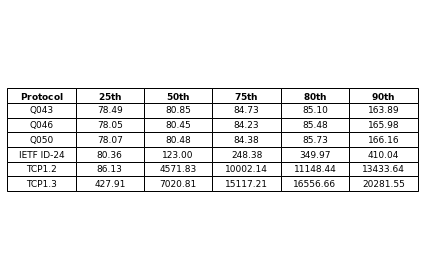

In [77]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050', 'IETF ID-24', 'TCP1.2', 'TCP1.3'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x6.Percentile(25)), "{:.2f}".format(x2.Percentile(25)), "{:.2f}".format(x4.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x6.Percentile(50)), "{:.2f}".format(x2.Percentile(50)), "{:.2f}".format(x4.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x6.Percentile(75)), "{:.2f}".format(x2.Percentile(75)), "{:.2f}".format(x4.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x6.Percentile(80)), "{:.2f}".format(x2.Percentile(80)), "{:.2f}".format(x4.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x6.Percentile(90)), "{:.2f}".format(x2.Percentile(90)), "{:.2f}".format(x4.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

fig.tight_layout()
plt.savefig('./AWS/London/handshake_times_ipv4_percentile.png', format='png', bbox_inches='tight')

In [78]:
write_percentiles('Q050.csv', x1)
write_percentiles('tcp12.csv', x2)
write_percentiles('Q046.csv', x3)
write_percentiles('tcp13.csv', x4)
#write_percentiles('Q098.csv', x5)
write_percentiles('IETFh3-24', x6)
write_percentiles('Q043.csv', x)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


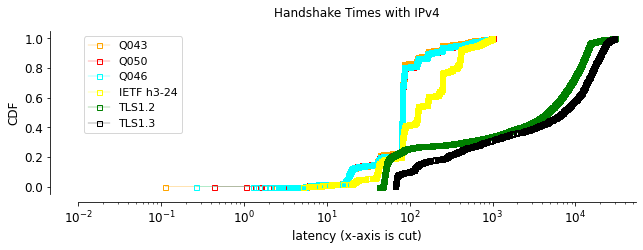

In [79]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q050
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q046
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#Q098
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#IETF h3-24
plt.plot(x6.xs, x6.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color='yellow')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
#ax.set_ylim([0,1.05])
ax.set_xlim([0.01, 54000])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q050', 'Q046', 'IETF h3-24', 'TLS1.2', 'TLS1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
##ax3.set_ylabel('[\'16th May - \'20thMay')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/London/handshake_times_ipv4.png', format='png', bbox_inches='tight')


In [80]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic50['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic46['TTFB'].values)
#x5 = Cdf.MakeCdfFromList(quic98['TTFB'].values)
x6 = Cdf.MakeCdfFromList(quicID24['TTFB'].values)
x4 = Cdf.MakeCdfFromList(tcp13['TTFB'].values)
x2 =Cdf.MakeCdfFromList(tcp12['TTFB'].values)

In [81]:
write_percentiles('Q050.csv', x1)
write_percentiles('tcp12.csv', x2)
write_percentiles('Q046.csv', x3)
write_percentiles('tcp13.csv', x4)
#write_percentiles('Q098.csv', x5)
write_percentiles('IETFh3-24.csv', x6)
write_percentiles('Q043.csv', x)

In [82]:
print_percentiles(x1, 'Q050')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q046')
print_percentiles(x4, 'tcp13')
#print_percentiles(x5, 'Q098')
print_percentiles(x6, 'IETFh3-24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q050

20th Percentile:123.869000

25th Percentile:159.374000

40th Percentile:240.981000

50th Percentile:245.696000

60th Percentile:282.891000

75th Percentile:369.120000

80th Percentile:596.971000

90th Percentile:801.359000

99th Percentile:924.577000

-----------------------------

-----------------------------

percentile values distribution for tcp12

20th Percentile:295.387000

25th Percentile:493.178000

40th Percentile:2471.963000

50th Percentile:4859.116000

60th Percentile:6998.727000

75th Percentile:10324.275000

80th Percentile:11466.950000

90th Percentile:13739.296000

99th Percentile:21166.042000

-----------------------------

-----------------------------

percentile values distribution for Q046

20th Percentile:123.993000

25th Percentile:159.629000

40th Percentile:240.965000

50th Percentile:245.642000

60th Percentile:282.779000

75th Percentile:369.330000

80th Percentile:609.042000

90th Perce

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


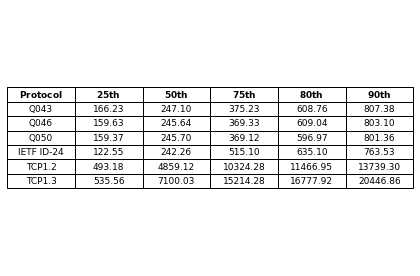

In [83]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050', 'IETF ID-24', 'TCP1.2', 'TCP1.3'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x6.Percentile(25)), "{:.2f}".format(x2.Percentile(25)), "{:.2f}".format(x4.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x6.Percentile(50)), "{:.2f}".format(x2.Percentile(50)), "{:.2f}".format(x4.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x6.Percentile(75)), "{:.2f}".format(x2.Percentile(75)), "{:.2f}".format(x4.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x6.Percentile(80)), "{:.2f}".format(x2.Percentile(80)), "{:.2f}".format(x4.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x6.Percentile(90)), "{:.2f}".format(x2.Percentile(90)), "{:.2f}".format(x4.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

fig.tight_layout()
plt.savefig('./AWS/London/TTFB_ipv4_percentile.png', format='png', bbox_inches='tight')

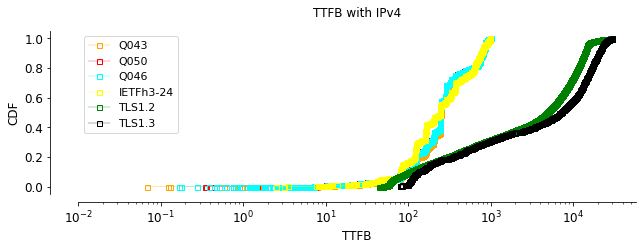

In [84]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q050
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q046
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#Q098
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#IETF h3-24
plt.plot(x6.xs, x6.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'yellow')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
#ax.set_ylim([0,1.05])
ax.set_xlim([0.01,58000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q050', 'Q046', 'IETFh3-24', 'TLS1.2', 'TLS1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
##ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/London/TTFB_ipv4.png', format='png', bbox_inches='tight')

In [85]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic50['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic46['TotalDownloadTime'].values)
#x5 = Cdf.MakeCdfFromList(quic98['TotalDownloadTime'].values)
x6 = Cdf.MakeCdfFromList(quicID24['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(tcp13['TotalDownloadTime'].values)
x2 =Cdf.MakeCdfFromList(tcp12['TotalDownloadTime'].values)

In [86]:
write_percentiles('Q050.csv', x1)
write_percentiles('tcp12.csv', x2)
write_percentiles('Q046.csv', x3)
write_percentiles('tcp13.csv', x4)
#write_percentiles('Q098.csv', x5)
write_percentiles('IETFh3-24.csv', x6)
write_percentiles('Q043.csv', x)

In [87]:
print_percentiles(x1, 'Q050')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q046')
print_percentiles(x4, 'tcp13')
#print_percentiles(x5, 'Q098')
print_percentiles(x6, 'IETFh3-24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q050

20th Percentile:125.774000

25th Percentile:163.117000

40th Percentile:242.244000

50th Percentile:246.550000

60th Percentile:285.412000

75th Percentile:450.777000

80th Percentile:621.328000

90th Percentile:803.470000

99th Percentile:942.037000

-----------------------------

-----------------------------

percentile values distribution for tcp12

20th Percentile:319.688000

25th Percentile:535.030000

40th Percentile:2529.850000

50th Percentile:4907.911000

60th Percentile:7045.231000

75th Percentile:10378.232000

80th Percentile:11520.738000

90th Percentile:13809.577000

99th Percentile:21343.517000

-----------------------------

-----------------------------

percentile values distribution for Q046

20th Percentile:125.756000

25th Percentile:163.250000

40th Percentile:242.225000

50th Percentile:246.493000

60th Percentile:285.432000

75th Percentile:450.907000

80th Percentile:633.260000

90th Perce

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


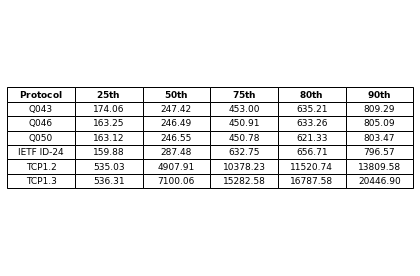

In [88]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050', 'IETF ID-24', 'TCP1.2', 'TCP1.3'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x6.Percentile(25)), "{:.2f}".format(x2.Percentile(25)), "{:.2f}".format(x4.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x6.Percentile(50)), "{:.2f}".format(x2.Percentile(50)), "{:.2f}".format(x4.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x6.Percentile(75)), "{:.2f}".format(x2.Percentile(75)), "{:.2f}".format(x4.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x6.Percentile(80)), "{:.2f}".format(x2.Percentile(80)), "{:.2f}".format(x4.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x6.Percentile(90)), "{:.2f}".format(x2.Percentile(90)), "{:.2f}".format(x4.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

fig.tight_layout()
plt.savefig('./AWS/London/TotalDownloadTime_ipv4_percentile.png', format='png', bbox_inches='tight')

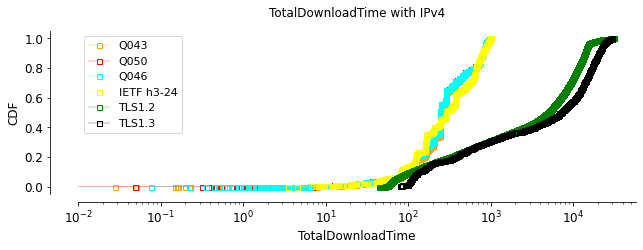

In [89]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q039
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q044
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#Q098
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#IETF h3-24
plt.plot(x6.xs, x6.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'yellow')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
#ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xlim([0.01,58000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q050', 'Q046', 'IETF h3-24', 'TLS1.2', 'TLS1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
##ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/London/TotalDownloadTime_ipv4.png', format='png', bbox_inches='tight')